## Getting World Map Countries Credit Rating

#### Importing Dependencies

In [1]:
import tradingeconomics as te
import pandas as pd
import numpy as np
import pycountry
import plotly.graph_objects as go
import plotly.express as px
from IPython.display import Image

#### API login


In [2]:
te.login() # Signup for a free API key at https://developer.tradingeconomics.com/

### Function 

In [3]:
def get_credit_ratings_world_map():

    df = te.getRatings()

    countriesWithoutISO = []

    missing_countries = {
        'Bolivia' : 'Bolivia, Plurinational State of',
    'Cape Verde' : 'Cabo Verde',
    'Cayman Islands      '  : 'Cayman Islands',   
    'Czech Republic' : 'Czechia',
    'European Union' : 'European Union',
    "Ivory Coast" : "Côte d'Ivoire",
    'Laos' : "Lao People's Democratic Republic",
    'Macau' : 'Macao',
    'Macedonia' : 'North Macedonia',
    'Moldova' : 'Moldova, Republic of',
    'Norway              '   : 'Norway',            
    'Republic of the Congo' : 'Congo, The Democratic Republic of the',
    'Russia' : 'Russian Federation',
    'Singapore           '  : 'Singapore',          
    'South Korea' : 'Korea, Republic of',
    'St Vincent and the Grenadines' : 'Saint Vincent and the Grenadines',
    'Swaziland' : 'Eswatini',
    'Sweden              ' : 'Sweden',              
    'Taiwan' : 'Taiwan, Province of China',
    'Tanzania' : 'Tanzania, United Republic of',
    'Turkey ': 'Turkey', 
    'Venezuela' : 'Venezuela, Bolivarian Republic of',
    'Vietnam' : 'Viet Nam',
        'Peru ':'Peru'
    }

    def get_iso3(country_full_name):
                """
                    returns country symbol iso alpha 3 format 
                """
                symbol = None
                iso = pycountry.countries.get(name=country_full_name)
                if iso != None:
                    symbol = iso.alpha_3
                else:
                    if country_full_name not in countriesWithoutISO:
                        countriesWithoutISO.append(country_full_name)
#                         print('Failed to get ISO for: ' + country_full_name)
                return symbol

    iso3_countries_names = []
    corrected_countries_names_list = df['Country'].replace(missing_countries)   
    df_corrected_countries_names = pd.DataFrame(corrected_countries_names_list)
    df_corrected_countries_names['value'] = df['SP']

    for item in df_corrected_countries_names['Country']:
        iso3_countries_names.append(get_iso3(item))

    df_corrected_countries_names['iso3'] = iso3_countries_names
    df_corrected_countries_names
    
    final_df = df_corrected_countries_names.replace("", np.nan)
    final_df = final_df.replace("N/A", np.nan)
    final_df = final_df.dropna()
    final_df['value_corrected'] = final_df['value'].str.replace("	BBB", "BBB", case=False, regex=True)
    del final_df["value"]
    final_df


#     fig = px.choropleth(df_corrected_countries_names, locations="iso3",title= "Countries Credits Rating - Source: Standard & Poor's" ,
#                         color="value", 
#                         hover_name="Country", # column to add to hover information
#                         color_continuous_scale=px.colors.sequential.Plasma,
                        
#                         labels={'value':'Credit Ratings'})
    
    fig = px.choropleth(final_df, locations="iso3",title= "Countries Credits Rating - Source: Standard & Poor's" ,
                        color="value_corrected", 
                        hover_name="Country", # column to add to hover information
                        color_discrete_sequence=px.colors.qualitative.Dark24,
                        
                        labels={'value_corrected':'Credit Ratings'})
    
    
    fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
    
    
    
    fig.show()

# GitHub non-dynamic preview

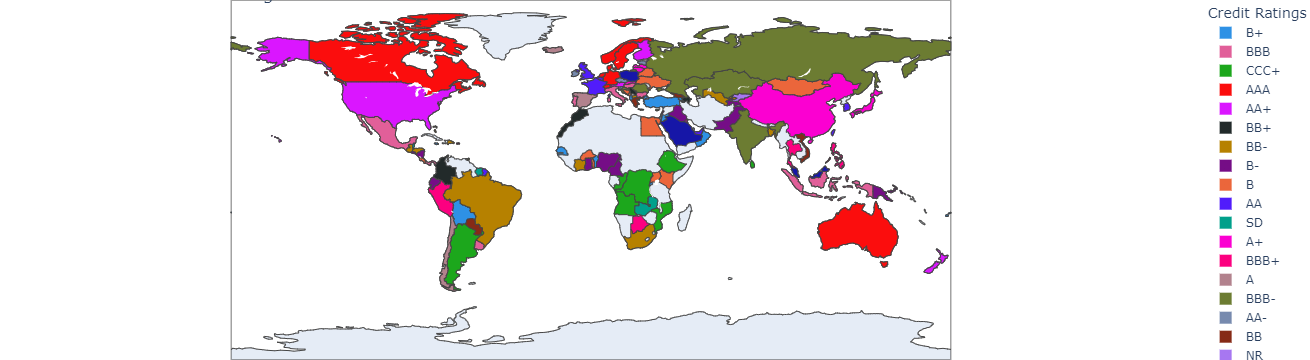

In [4]:
Image(filename='world_map_countries_credit_rating.png') 

## Dynamic Plot uses Python's Kernel to render 
### (You can go to Trading Economics Jupyter Lab to use the dynamic plot)

In [6]:
# Run this line of code to get a dynamic plot
get_credit_ratings_world_map()